In [28]:
import numpy as np 
import pandas as pd
import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [29]:
# load the normalized version of disaster tweets dataset from Kaggle

df_train = pd.read_csv('Data\\disaster_tweets_kaggle\\train_norm.csv', index_col = False)

df_train.head()

,text,target,text_norm,stemmed_keyword
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire


In [30]:
df_train.head()

,text,target,text_norm,stemmed_keyword
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             7593 non-null   object
 1   target           7593 non-null   int64 
 2   text_norm        7593 non-null   object
 3   stemmed_keyword  7593 non-null   object
dtypes: int64(1), object(3)
memory usage: 237.4+ KB


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='target', ylabel='count'>

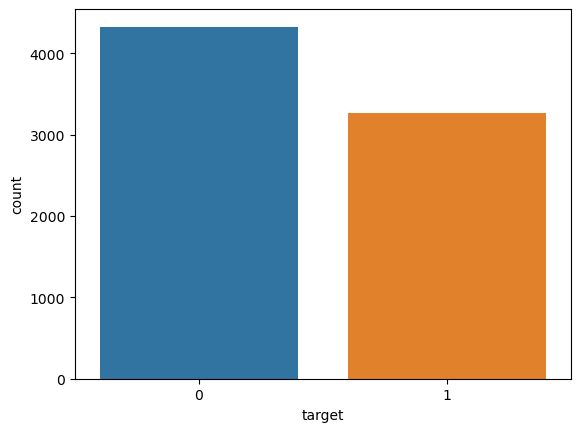

In [33]:
# let's check if the training data is balanced
sns.countplot(x = 'target', data = df_train)

<Axes: >

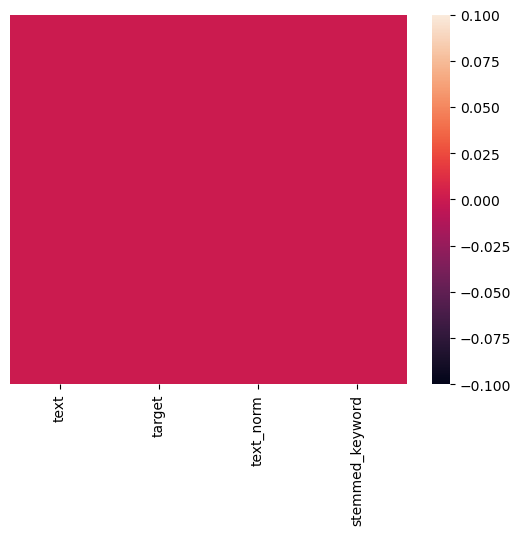

In [34]:
# visualizing null values
sns.heatmap(df_train.isnull(),yticklabels = False)

## Feature Engineering

To decide what strategy to use for data processing and what type of a model to use, the training data must be thoroughly analyzed. Firstly, we will check if all keywords are related to disaster and formulate a method to identify which ones are more relevant with the help of the associated target value.

In [35]:
# create a series of unique keywords
pd.Series(df_train.groupby('stemmed_keyword').count().index, name = 'stemmed_keyword')

0                 ablaz
1                 accid
2            aftershock
3      airplane%20accid
4                 ambul
             ...       
161             wildfir
162           windstorm
163               wound
164               wreck
165             wreckag
Name: stemmed_keyword, Length: 166, dtype: object

### 1. Disaster Association Coefficient

As most keywords seem to be asscoiated with disasters, we need to perform feature engineering to extract useful information from the distribution of these keywords with respect to the target class. Since the loaded data has already been processed no text processing is required at this point.

In [36]:
# calculates the disaster association coefficient for a keyword
def get_disaster_association(keyword):
    
    # get the number of times the keyword is associated with a true disaster tweet
    target_0_count = (df_train[df_train['stemmed_keyword'] == keyword]['target'] == 0).sum()
    
    # get the number of times the keyword is not associated with a true disaster tweet
    target_1_count = (df_train[df_train['stemmed_keyword'] == keyword]['target'] == 1).sum()
    
    # association value = true association count / total
    return target_1_count/(target_0_count + target_1_count)

In [37]:
# create columns with the keyword's association to actual disaster tweeets
df_train['disaster_asc_coeff'] = df_train['stemmed_keyword'].apply(get_disaster_association)

In [38]:
df_train.head(20)

,text,target,text_norm,stemmed_keyword,disaster_asc_coeff
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak,0.785714
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire,0.386364
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu,0.767241
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu,0.767241
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire,0.386364
5,#RockyFire Update => California Hwy. 20 closed...,1,rockyfir updat california hwi 20 close direct ...,fire,0.386364
6,#flood #disaster Heavy rain causes flash flood...,1,flood disast heavi rain caus flash flood stree...,disast,0.444444
7,I'm on top of the hill and I can see a fire in...,1,im top hill see fire wood,fire,0.386364
8,There's an emergency evacuation happening now ...,1,there emerg evacu happen build across street,emerg,0.394737
9,I'm afraid that the tornado is coming to our a...,1,im afraid tornado come area,tornado,0.472222


### Distribution of Disaster Association Coefficient

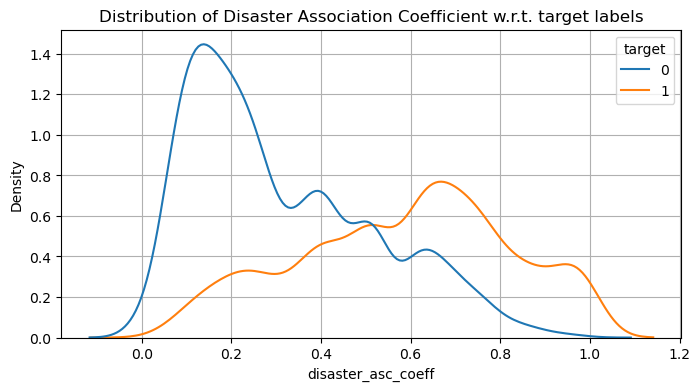

In [55]:
plt.figure(figsize = (8,4))
sns.kdeplot(df_train, x = 'disaster_asc_coeff', hue = 'target')
plt.title('Distribution of Disaster Association Coefficient w.r.t. target labels')
plt.grid()

The above KDE plot shows that distribution of Disaster Association Coefficients for non disaster tweets is more towards the left as opposed to that of disaster related tweets.

In [39]:
# save association oefficients as a dictionary for transformation
association_dict = df_train.groupby('stemmed_keyword')['disaster_asc_coeff'].mean().sort_values(ascending = False).to_dict()

In [40]:
association_dict

{'wreckag': 1.0,
 'debri': 1.0,
 'outbreak': 0.975,
 'oil%20spil': 0.9736842105263158,
 'typhoon': 0.9736842105263158,
 'suicide%20bomb': 0.9494949494949495,
 'rescuer': 0.9142857142857143,
 'nuclear%20disast': 0.9117647058823529,
 'raze': 0.8857142857142857,
 'wildfir': 0.8787878787878788,
 'wild%20fir': 0.8709677419354839,
 'airplane%20accid': 0.8571428571428571,
 'mass%20murd': 0.8484848484848485,
 'buildings%20on%20fir': 0.8484848484848485,
 'bridge%20collaps': 0.8285714285714286,
 'forest%20fir': 0.8235294117647058,
 'drought': 0.8,
 'thunderstorm': 0.7878787878787878,
 'violent%20storm': 0.7878787878787878,
 'earthquak': 0.7857142857142857,
 'evacu': 0.7672413793103449,
 'sandstorm': 0.7567567567567568,
 'hailstorm': 0.75,
 'collis': 0.7435897435897436,
 'terrorist': 0.7419354838709677,
 'heat%20wav': 0.7352941176470589,
 'derail': 0.7321428571428571,
 'displac': 0.7222222222222222,
 'bush%20fir': 0.72,
 'terror': 0.7058823529411765,
 'survivor': 0.7,
 'massacr': 0.69444444444444

### 2. Tweet Length
Length of the tweet can be an important factor in distinguishing a disaster tweet from a non disaster tweet

In [41]:
# Add length of the tweet as new attribute
df_train['length'] = df_train['text'].apply(lambda x: len(x))
df_train.head()

,text,target,text_norm,stemmed_keyword,disaster_asc_coeff,length
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak,0.785714,69
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire,0.386364,38
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu,0.767241,133
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu,0.767241,65
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire,0.386364,88


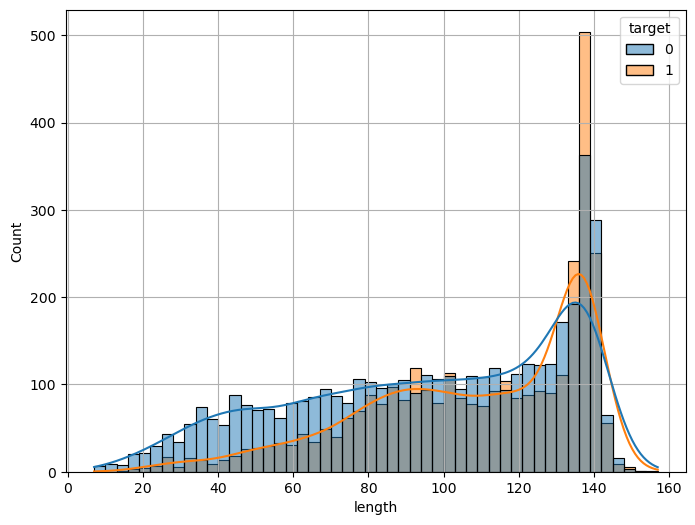

In [43]:
# check target variable distribution with respect to length
plt.figure(figsize = (8,6))
sns.histplot(df_train, x = 'length', hue = 'target', bins = 50, kde = True)
plt.grid()

Let's check the lengthof the normalized text.

In [44]:
df_train['length_norm'] = df_train['text_norm'].apply(lambda x: len(x))
df_train.head()

,text,target,text_norm,stemmed_keyword,disaster_asc_coeff,length,length_norm
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak,0.785714,69,41
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire,0.386364,38,36
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu,0.767241,133,69
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu,0.767241,65,49
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire,0.386364,88,52


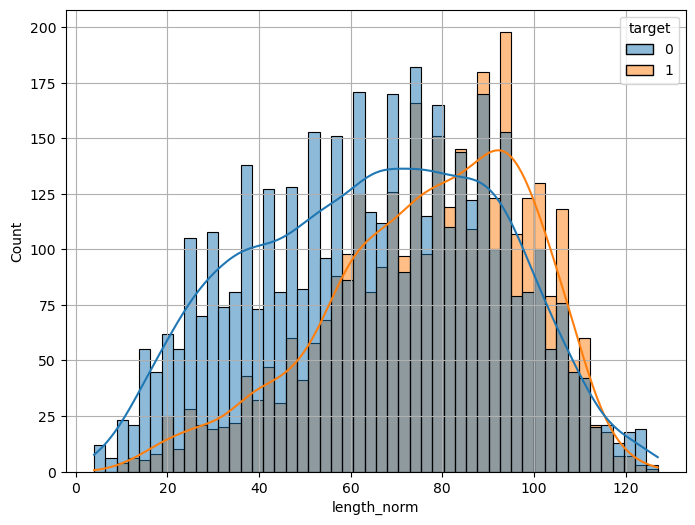

In [45]:
# check target variable distribution with respect to length_norm
plt.figure(figsize = (8,6))
sns.histplot(df_train, x = 'length_norm', hue = 'target', bins = 50, kde = True)
plt.grid()

As the distribution of the length with respect to the target label is mpre distinguished for the normalized text, it will be used for model training.

In [46]:
df_train.drop('length', axis = 1, inplace = True)
df_train.head()

,text,target,text_norm,stemmed_keyword,disaster_asc_coeff,length_norm
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak,0.785714,41
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire,0.386364,36
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu,0.767241,69
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu,0.767241,49
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire,0.386364,52


### 3. Sentiment Analysis
Although keywords can be an important factor in this type of classification, the overall sentiment of the tweet can also provide crucial information regarding the nature of the tweet. Although a custom model can be trained to predict sentiment, for this project I am using the <b> NLTK VADER </b> library which relies on a rule based sentiment-analyzer.

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [48]:
# returns a dictionary of values
def get_sentiment_val(text):
    res_dict = sia.polarity_scores(text)
    return pd.Series([res_dict['neg'], res_dict['neu'], res_dict['pos']])

In [50]:
df_train[['neg', 'neu', 'pos']] = df_train['text_norm'].apply(get_sentiment_val)

In [52]:
df_train.head()

,text,target,text_norm,stemmed_keyword,disaster_asc_coeff,length_norm,neg,neu,pos
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,earthquak,0.785714,41,0.000,1.000,0.0
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,fire,0.386364,36,0.286,0.714,0.0
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,evacu,0.767241,69,0.000,1.000,0.0
3,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order california,evacu,0.767241,49,0.000,1.000,0.0
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,fire,0.386364,52,0.000,1.000,0.0


### 4. Identifying Location mentions in Tweet
Mentions of a certain area, city or country in the tweet can be useful in identifying whether the tweet is related to disaster or as tweets with a location mentoned are more likely to be linked to disaster. To implement this we will use the <b>geography</b> package.

In [ ]:
# install geotext 
# !pip install geotext

In [ ]:
import geotext
from geotext import GeoText

### Distribution of different sentiment tags

In [ ]:
plt.figure(figsize = (8,4))
sns.kdeplot(df, x = 'pos', hue = 'target')
plt.title('Distribution of tweets with positive sentiment w.r.t. target labels')
plt.grid()

In [ ]:
plt.figure(figsize = (8,4))
sns.kdeplot(df, x = 'neu', hue = 'target')
plt.title('Distribution of tweets with neutral sentiment w.r.t. target labels')
plt.grid()

In [ ]:
plt.figure(figsize = (8,4))
sns.kdeplot(df, x = 'neg', hue = 'target')
plt.title('Distribution of tweets with negative sentiment w.r.t. target labels')
plt.grid()

As we can clearly see that both targets have similar distribution for all sentiment tags given by NLTK's VADER sentiment analysis package, using these attributes for model training will not be too useful.

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# drop all columns except 'association coefficient' and those related to sentiment analysis
X = train_processed.drop('target', axis = 1)
y = train_processed['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
X_train.head()

### Model Selection
As this is a classification problem, the simplest model that can be used is logistic regression. However, logistic regression only performs well for if classes are linearly separable. For data that is not linearly separable we can use KNN, SVC, Random Forests. All these models will be implemented and the results for each will be compared.